In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import requests
from collections import Counter
from sklearn.cluster import KMeans
import re

In [2]:
# INITIAL DATA 
df = pd.read_csv("VeVe NFT Spreadsheet - DigitalComics.csv")
df

,NFT,Rarity,Quantity,Veve Price,% Gain from Veve Price,Recent Price Movement,Trend!,1/12,1/3,12/7,...,9/23,9/19,9/18,9/17,9/15,9/12,9/9,9/3,8/29,8/26
0,This was made by Butt Thompson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Marvel Comics: Classic,Common,48000.0,$ 6.99,4177.54%,66.11%,NaN,$ 299.00,$ 180.00,$ 215.00,...,$ 64.00,$ 65.00,$ 58.00,$ 62.00,$ 36.00,$ 35.00,$ 15.00,$ 16.00,$ 14.00,$ 10.00
2,Marvel Comics: Vintage,Uncommon,6000.0,$ 6.99,5622.46%,81.82%,NaN,$ 400.00,$ 220.00,$ 292.00,...,$ 217.00,$ 154.00,$ 109.00,$ 129.00,$ 82.00,$ 86.00,$ 28.00,$ 33.00,$ 25.00,$ 24.00
3,Marvel Comics: Hero,Rare,3000.0,$ 6.99,11631.04%,58.91%,NaN,$ 820.00,$ 516.00,$ 508.00,...,$ 660.00,$ 345.00,$ 320.00,$ 274.00,$ 269.00,$ 286.00,$ 138.00,$ 150.00,$ 63.00,$ 60.00
4,Marvel Comics: Vibranium,Ultra Rare,2400.0,$ 6.99,38240.49%,112.70%,NaN,"$ 2,680.00","$ 1,260.00","$ 1,745.00",...,"$ 2,199.00",$ 889.00,$ 715.00,$ 750.00,$ 605.00,$ 725.00,$ 290.00,$ 443.00,$ 160.00,$ 165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Alpha Flight #1: Classic,Common,6000.0,$ 6.99,572.39%,NaN,NaN,$ 47.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,Alpha Flight #1: Vintage,Uncommon,2250.0,$ 6.99,643.92%,NaN,NaN,$ 52.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,Alpha Flight #1: Hero,Rare,1000.0,$ 6.99,1402.15%,NaN,NaN,$ 105.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,Alpha Flight #1: Vibranium,Ultra Rare,500.0,$ 6.99,3905.72%,NaN,NaN,$ 280.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# CLEANING THE DATA
def clean_data(df):
    df_copy = df.copy()
    df_copy["Rarity"] = df_copy["Rarity"].replace({"Common":1, "Uncommon":2, "Rare":3, "Ultra Rare":4, "Secret Rare": 5})
    new_df = df_copy.loc[:, df.columns != "NFT"]
    for x in new_df.columns:
        if isinstance(new_df[x][1], str):
            if "%" in new_df[x][1]:
                new_df[x] = new_df[x].str.rstrip('%').astype('float') / 100.0
            else:
                new_df[x] = new_df[x].str.replace('$', '')
                new_df[x] = new_df[x].str.replace(',', '')
                new_df[x] = new_df[x].astype(float)
    new_df.insert(0,'NFT',df_copy["NFT"])
    new_df = new_df.drop(columns=['Trend!']).fillna(0)
    return new_df.drop(index = 0)

In [4]:
new_df = clean_data(df)
new_df

,NFT,Rarity,Quantity,Veve Price,% Gain from Veve Price,Recent Price Movement,1/12,1/3,12/7,12/1,...,9/23,9/19,9/18,9/17,9/15,9/12,9/9,9/3,8/29,8/26
1,Marvel Comics: Classic,1.0,48000.0,6.99,41.7754,0.6611,299.0,180.0,215.0,90.0,...,64.0,65.0,58.0,62.0,36.0,35.0,15.0,16.0,14.0,10.0
2,Marvel Comics: Vintage,2.0,6000.0,6.99,56.2246,0.8182,400.0,220.0,292.0,180.0,...,217.0,154.0,109.0,129.0,82.0,86.0,28.0,33.0,25.0,24.0
3,Marvel Comics: Hero,3.0,3000.0,6.99,116.3104,0.5891,820.0,516.0,508.0,395.0,...,660.0,345.0,320.0,274.0,269.0,286.0,138.0,150.0,63.0,60.0
4,Marvel Comics: Vibranium,4.0,2400.0,6.99,382.4049,1.1270,2680.0,1260.0,1745.0,1099.0,...,2199.0,889.0,715.0,750.0,605.0,725.0,290.0,443.0,160.0,165.0
5,Marvel Comics: True Believer,5.0,600.0,6.99,7009.0143,0.6350,49000.0,29969.0,36969.0,29999.0,...,40000.0,19000.0,14450.0,13999.0,14500.0,13777.0,14999.0,18000.0,6500.0,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Alpha Flight #1: Classic,1.0,6000.0,6.99,5.7239,0.0000,47.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,Alpha Flight #1: Vintage,2.0,2250.0,6.99,6.4392,0.0000,52.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233,Alpha Flight #1: Hero,3.0,1000.0,6.99,14.0215,0.0000,105.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,Alpha Flight #1: Vibranium,4.0,500.0,6.99,39.0572,0.0000,280.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Rarity', ylabel='11/9'>

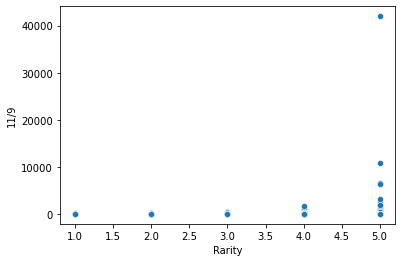

In [5]:
sns.scatterplot(data=new_df, x = "Rarity", y = "11/9")

<AxesSubplot:xlabel='Rarity', ylabel='11/9'>

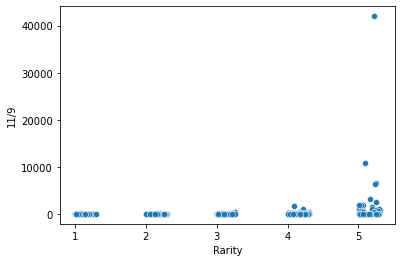

In [6]:
df_jit = new_df.copy()
df_jit["Rarity"] += np.random.random(df_jit.shape[0]) * 0.3
df_jit["11/9"] += np.random.random(df_jit.shape[0]) * 0.3
sns.scatterplot(data=df_jit, x="Rarity", y="11/9")

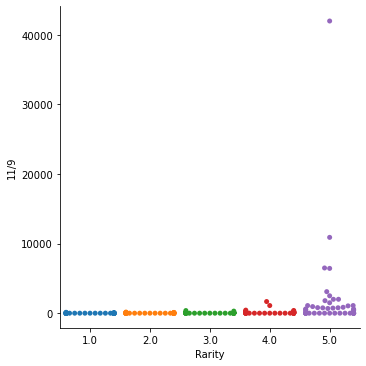

In [7]:
ax1=sns.catplot(data=new_df, kind="swarm", x="Rarity", y="11/9")

In [8]:
def select_comic(new_df, name):
    dd = new_df.loc[new_df["NFT"] == name]
    df1 = dd.iloc[:, 7:]
    df1 = df1[df1.columns[::-1]].T
    df1 = df1.rename(columns={df1.columns[0]: "Price"})
    return df1

In [9]:
def floor_prices(df):
    fp = []
    length = np.arange(len(df["Price"]))
    for l in length:
        if df["Price"][l] != 0:
            fp.append(df["Price"][l]) 
    return fp

In [10]:
def plot_fp(df, fp):
    dates = len(floor_prices(df)) + 1
    date_fp = df[-dates:]
    date_fp[date_fp.columns[::-1]].plot()
    plt.axhline(np.mean(floor_prices(df)), ls='--', linewidth=3, color='red')
    return np.mean(floor_prices(df))

98.88888888888889

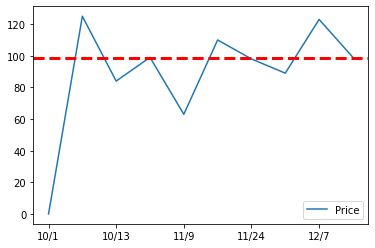

In [11]:
dare = select_comic(new_df, "Daredevil #1: Hero")
fp_dare = floor_prices(dare)
plot_fp(dare, fp_dare)

32.22222222222222

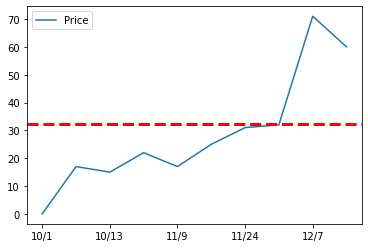

In [12]:
darec = select_comic(new_df, "Daredevil #1: Classic")
fp_darec = floor_prices(dare)
plot_fp(darec, fp_darec)

In [13]:
def plot_two_fp(df, df1):
    dates1, dates2 = len(floor_prices(df)) + 1, len(floor_prices(df1)) + 1
    date_fp1, date_fp2 = df[-dates1:], df1[-dates2:]
    ax = date_fp1[date_fp1.columns[::-1]].plot()
    h1 =plt.axhline(max(floor_prices(df)), ls='--', linewidth=1, color='red')
    h2 = plt.axhline(max(floor_prices(df1)), ls='--', linewidth=1, color='green')
    date_fp2.plot(ax=ax)
    L=plt.legend()
    L.get_texts()[0].set_text("Comic Book 1")
    L.get_texts()[1].set_text("Comic Book 2")
    return max(floor_prices(df)) - max(floor_prices(df1))

54.0

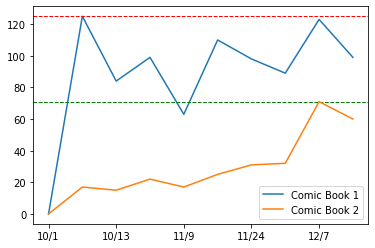

In [14]:
plot_two_fp(dare, darec)

In [15]:
def plot_comic(*args):
    comics = []
    count = 1
    for df in args:
            dates = len(floor_prices(df)) + 1
            date_fp = df[-dates:]
            plot = plt.plot(date_fp[date_fp.columns[::-1]])
            comics.append("Comic" + str(count))
            count += 1
    plt.legend(comics)
    return comics
    

['Comic1', 'Comic2', 'Comic3', 'Comic4']

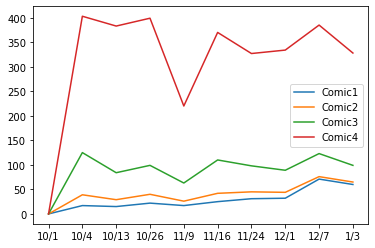

In [16]:
c = select_comic(new_df, "Daredevil #1: Classic")
uc = select_comic(new_df, "Daredevil #1: Vintage")
r = select_comic(new_df, "Daredevil #1: Hero")
ur = select_comic(new_df, "Daredevil #1: Vibranium")
sr = select_comic(new_df, "Daredevil #1: True Believer")

plot_comic(c, uc, r, ur)


['Comic1', 'Comic2', 'Comic3', 'Comic4', 'Comic5']

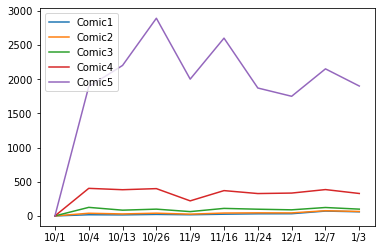

In [17]:
plot_comic(c, uc, r, ur, sr)

26.227272727272727

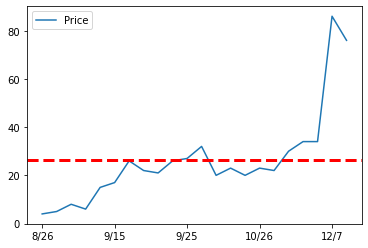

In [18]:
c = select_comic(new_df, "Fantastic Four #1: Classic")
ff_dare = floor_prices(c)
plot_fp(c, ff_dare)

In [20]:
from sklearn.preprocessing import StandardScaler
y = new_df["Rarity"].to_frame()

t = new_df[["Quantity", "% Gain from Veve Price", "% Gain from Veve Price"]]
x = StandardScaler().fit_transform(t)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf["Rarity"] = finalDf["Rarity"].shift(-1)
finalDf

,principal component 1,principal component 2,Rarity
0,-0.388151,4.072747,1.0
1,-0.099361,-0.051398,2.0
2,-0.067565,-0.345206,3.0
3,-0.013156,-0.400634,4.0
4,1.252293,-0.490472,5.0
...,...,...,...
231,-0.083235,-0.420296,2.0
232,-0.073287,-0.542944,3.0
233,-0.065147,-0.591715,4.0
234,-0.027732,-0.613788,5.0


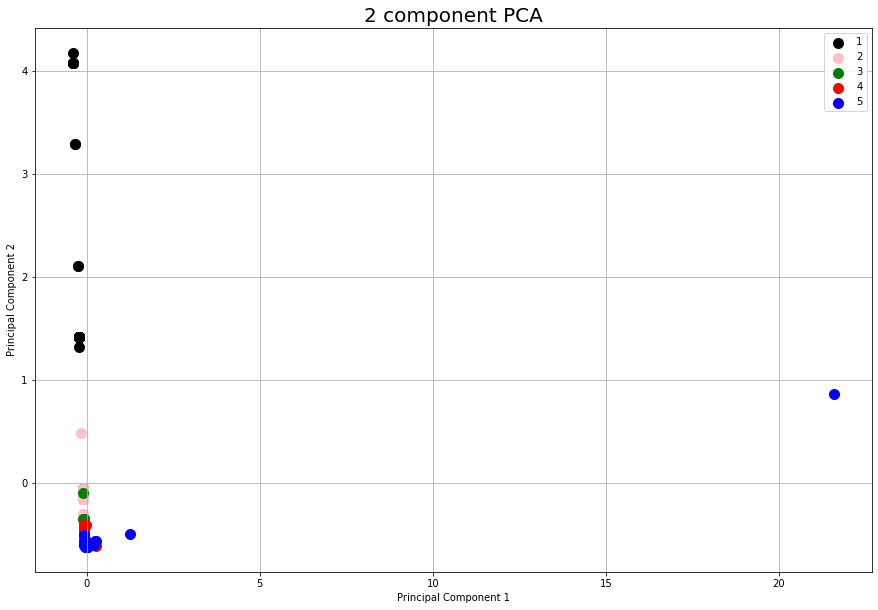

In [22]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_title('2 component PCA', fontsize = 20)
p = [1,2,3,4,5]
colors = ['black', 'pink',"green", "red", "blue"]
for pitch, color in zip(p,colors):
    i = finalDf['Rarity'] == pitch
    ax.scatter(finalDf.loc[i, 'principal component 1'], finalDf.loc[i, 'principal component 2'], c = color, s = 100)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.legend(p)
ax.grid()

In [23]:
from marvel import Marvel

In [24]:
# MY MARVEL API KEY WOULD BE HERE.
comics = m.comics.all(limit = 100, format = "comic", titleStartsWith = "Marvel Comics", startYear = "1939", orderBy = "issueNumber")

In [59]:
def get_comic(title, issue, year):
    return  m.comics.all(limit = 1, format = "comic", titleStartsWith = str(title), startYear = str(year), issueNumber = str(issue), orderBy = "issueNumber")

In [60]:
# THIS FUNCTION IS TO DOWNLOAD AN IMAGE FROM A GIVEN LINK INTO THE SERVER

# PARAMETER NAMES:
# LINK: THE LINK OF THE IMAGE
# NAME: NAME OF THE COMIC BOOK

def get_image(link, name):
    response = requests.get(link)
    name_link = str(name) + ".jpg"
    print(name_link)
    file = open(name_link, "wb")
    file.write(response.content)
    file.close()
    return 


def create_color2(image, name):
#     FUNCTION: RETURNS THE MOST USED COLOR OF THE GIVEN IMAGE
       
#     VARIABLES

#     IM: IMAGE
#     WIDTH: WIDTH OF IMAGE
#     HEIGHT: HEIGHT OF IMAGE
#     ARRAY: ALL RGB VALUES OF IMAGE
#     T, NUMBER_OF_ROWS, RANDOM_INDICES, RANDOM_ROWS: VARIABLES USED TO HELP RESHAPE ARRAY INTO TWO DIMENSIONS
#     MEANS: CLUSTERS FROM KMEANS

    im = Image.open(image)
    pix = im.load()
    width = im.size[0]
    height = im.size[1]
    array = np.array(im)
    t = array.reshape(-1, array.shape[-1])
    number_of_rows = t.shape[0]
    random_indices = np.random.choice(number_of_rows, size=100, replace=False)
    random_rows = t[random_indices, :]
    kmeans = KMeans(n_clusters=10,random_state = 1)
    test = kmeans.fit(random_rows)
    means = kmeans.cluster_centers_
    means = np.round(means,0).astype(int)
    from collections import Counter, defaultdict
    c = max(Counter(kmeans.labels_), key=Counter(kmeans.labels_).get)
    return means[c]


def get_chracter_comics2(comics):
    
#     FUNCTION: GETS THE DATA FROM MARVEL'S API AND CREATES THE COLOR PALETTES USING THE PREVIOUS FUNCTIONS. RETURNS THE 
#     DATAFRAME AS WELL
       
#     VARIABLES

#     DF: DATAFRAME OF MARVEL'S API 
#     LINKS: ARRAY OF IMAGE LINKS
#     NAME: NAME OF COMIC BOOK
#     LINK: LINK OF IMAGE FROM SERVER
    

    df = pd.DataFrame(comics)
    new_df = pd.DataFrame(df["data"][3])[["title", "thumbnail"]]
    links = []
    for x in new_df["thumbnail"]:
        links.append(re.findall("(?P<url>https?://[^\s][^,']+)", str(x)))
    new_df["thumbnail"] = links
    for x in np.arange(len(new_df)):
        name = str(new_df["title"][x])
        link = str(new_df["thumbnail"][x][0]) + ".jpg"
        get_image(link, name)
        t = create_color2(name + ".jpg", name)    
    return t

In [61]:
comics = get_comic("Marvel Comics","1", "1939")
test = get_chracter_comics2(comics)
test

Marvel Comics (1939) #1.jpg


array([238, 223, 220])